In [2]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/temp_viscosity_tree.model.sav", "rb"))
features = (
    pd.read_csv("data/viscosity_train.csv", sep=";", decimal=",")
    .drop(["T"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- Viscosity <= 2.86
|   |--- Viscosity <= 1.38
|   |   |--- value: [70.00]
|   |--- Viscosity >  1.38
|   |   |--- Viscosity <= 1.78
|   |   |   |--- Viscosity <= 1.72
|   |   |   |   |--- TiO2 <= 0.03
|   |   |   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |   |   |--- value: [52.50]
|   |   |   |   |   |--- Al2O3 >  0.03
|   |   |   |   |   |   |--- value: [57.50]
|   |   |   |   |--- TiO2 >  0.03
|   |   |   |   |   |--- value: [60.00]
|   |   |   |--- Viscosity >  1.72
|   |   |   |   |--- value: [70.00]
|   |   |--- Viscosity >  1.78
|   |   |   |--- TiO2 <= 0.18
|   |   |   |   |--- Al2O3 <= 0.18
|   |   |   |   |   |--- Viscosity <= 2.24
|   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |--- Viscosity >  2.24
|   |   |   |   |   |   |--- value: [40.00]
|   |   |   |   |--- Al2O3 >  0.18
|   |   |   |   |   |--- Viscosity <= 2.29
|   |   |   |   |   |   |--- value: [60.00]
|   |   |   |   |   |--- Viscosity >  2.29
|   |   |   |   |   |   |--- value: [55.00]
|   |

In [3]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

25

[if (Viscosity > 2.856) and (Viscosity > 3.636) and (Viscosity <= 6.267) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (TiO2 <= 0.025) -> 20.0,
 if (Viscosity > 2.856) and (Viscosity > 3.636) and (Viscosity > 6.267) -> 20.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (Viscosity <= 1.78) and (Viscosity <= 1.719) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 57.5,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (Viscosity <= 1.78) and (Viscosity <= 1.719) and (TiO2 > 0.025) -> 60.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (Viscosity <= 1.78) and (Viscosity > 1.719) -> 70.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (Viscosity > 1.78) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (Viscosity <= 2.235) -> 50.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (Viscosity > 1.78) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) and (Viscosity > 2.235) -> 40.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (Viscosity > 1.78) and (TiO2 <= 0.175) and (Al2O3 >

In [4]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

25

[if (Viscosity > 2.856) and (Viscosity <= 6.267) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 20.0,
 if (Viscosity > 2.856) -> 20.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 57.5,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 > 0.025) -> 60.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) -> 70.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 50.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 40.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 60.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 55.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 > 0.175) -> 70.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 > 0.175) -> 60.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 > 0.175) -> 55.0,
 if (Visco

In [5]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

17

[if (Viscosity > 2.856) and (Viscosity <= 6.267) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 20.0,
 if (Viscosity > 2.856) -> 20.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 57.5,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 > 0.025) -> 60.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) -> 70.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.175) and (Al2O3 <= 0.175) -> 45.0,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 <= 0.175) and (Al2O3 > 0.175) -> 57.5,
 if (Viscosity <= 2.856) and (Viscosity > 1.377) and (TiO2 > 0.175) -> 61.667,
 if (Viscosity > 2.856) and (Viscosity <= 3.636) and (TiO2 <= 0.175) and (Al2O3 <= 0.025) -> 25.0,
 if (Viscosity > 2.856) and (Viscosity <= 3.636) and (TiO2 <= 0.175) and (Al2O3 > 0.025) -> 30.0,
 if (Viscosity > 2.856) and (Viscosity <= 3.636) and (TiO2 <= 0.175) -> 37.5,
 if (Viscosity > 2.856) and (Viscosity <= 3.636) and (TiO2 > 0.175) -> 45.0,
 if (Vi

In [6]:
train = pd.read_csv("data/viscosity_train.csv", sep=";", decimal=",")
test = pd.read_csv("data/viscosity_test.csv", sep=";", decimal=",")

display(train.head(3))
display(test.head(3))

T  Al2O3  TiO2  Viscosity
0  20    0.0   0.0      3.707
1  25    0.0   0.0      3.180
2  35    0.0   0.0      2.361

T  Al2O3  TiO2  Viscosity
0  30    0.0   0.0      2.716
1  40    0.0   0.0      2.073
2  60    0.0   0.0      1.329

In [8]:
from src.rules import simplify_rules

rules = simplify_rules(train, rules)
display(len(rules))
rules

17

[if (Viscosity = 4.562) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 20.0,
 if (Viscosity = 7.132) -> 20.0,
 if (Viscosity = 2.117) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 57.5,
 if (Viscosity = 2.117) and (TiO2 = 0.3) -> 60.0,
 if (Viscosity = 2.117) -> 70.0,
 if (Viscosity = 2.117) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 45.0,
 if (Viscosity = 2.117) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 57.5,
 if (Viscosity = 2.117) and (TiO2 = 0.3) -> 61.667,
 if (Viscosity = 3.246) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 25.0,
 if (Viscosity = 3.246) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 30.0,
 if (Viscosity = 3.246) and (TiO2 = 0.0) -> 37.5,
 if (Viscosity = 3.246) and (TiO2 = 0.3) -> 45.0,
 if (Viscosity = 1.194) -> 70.0,
 if (Viscosity = 4.562) and (TiO2 = 0.1) and (Al2O3 = 0.0) -> 22.5,
 if (Viscosity = 4.562) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 31.25,
 if (Viscosity = 4.562) and (TiO2 = 0.3) -> 30.0,
 if (Viscosity = 2.117) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 52.5]

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


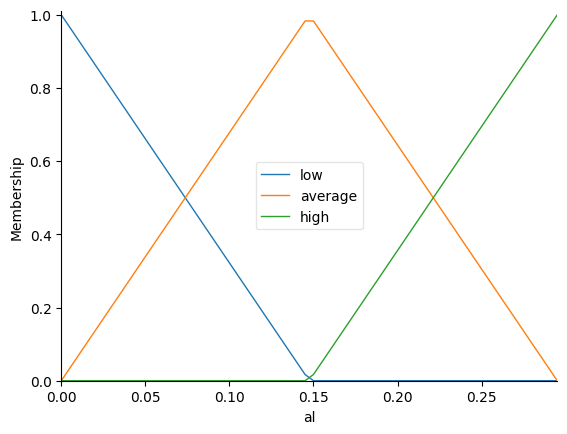

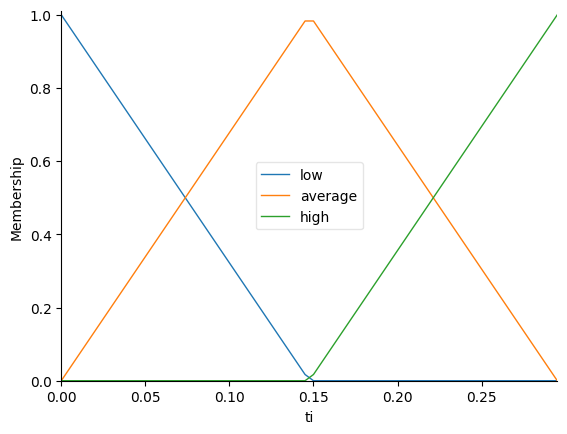

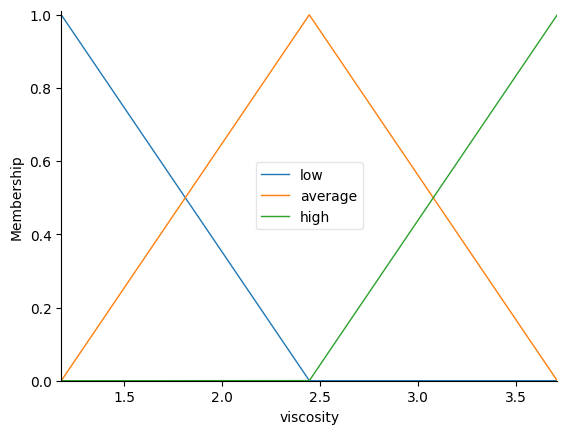

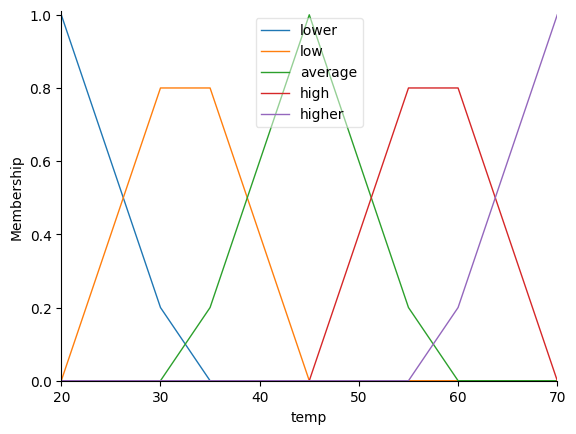

In [27]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

al = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "ti")
viscosity = ctrl.Antecedent(np.arange(1.18, 3.71, 0.00001), "viscosity")
temp = ctrl.Consequent(train["T"].sort_values().unique(), "temp")

al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
viscosity.automf(3, variable_type="quant")
viscosity.view()
temp.automf(5, variable_type="quant")
temp.view()

In [28]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "Viscosity": viscosity, "consequent": temp}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

11

[IF viscosity[high] THEN temp[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF viscosity[average] THEN temp[higher]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (viscosity[average] AND ti[low]) AND al[low] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (viscosity[average] AND ti[low]) AND al[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF viscosity[average] AND ti[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (viscosity[high] AND ti[low]) AND al[low] THEN temp[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF viscosity[high] AND ti[low] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF viscosity[high] AND ti[high] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF viscosity[low] THE

 Antecedents 
Antecedent: viscosity               = 2.716
  - low                             : 0.0
  - average                         : 0.7857659516520321
  - high                            : 0.2142340483479678
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF viscosity[high] THEN temp[lower]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - viscosity[high]                                        : 0.2142340483479678
                                           viscosity[high] = 0.2142340483479678
  Activation (THEN-clause):
                                               temp[lower] : 0.2142340483479678

RULE #1:
  IF viscosity[average

np.float64(48.54014115741227)

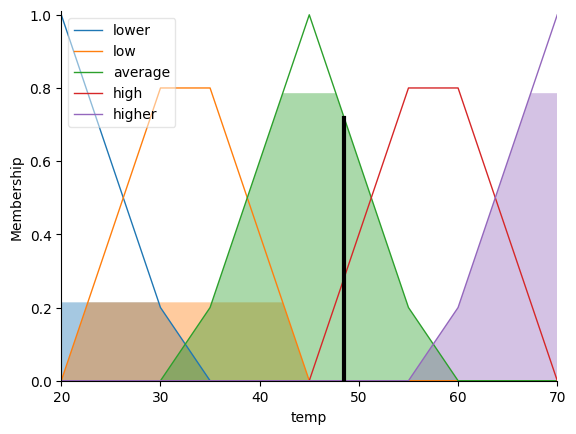

In [29]:
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.input["viscosity"] = 2.716
sim.compute()
sim.print_state()
display(sim.output["temp"])
temp.view(sim=sim)

In [30]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.input["viscosity"] = row["Viscosity"]
    sim.compute()
    return sim.output["temp"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))


result_train = train.copy()
result_train["Real"] = result_train["T"]
result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_test = test.round({"RMSE": 3})
result_train.head(15)

T  Al2O3  TiO2  Viscosity  Real   Inferred       RMSE
0   20   0.00   0.0      3.707    20  30.377181  10.377181
1   25   0.00   0.0      3.180    25  41.919069  16.919069
2   35   0.00   0.0      2.361    35  51.831632  16.831632
3   45   0.00   0.0      1.832    45  51.597678   6.597678
4   50   0.00   0.0      1.629    50  53.497509   3.497509
5   55   0.00   0.0      1.465    55  55.761343   0.761343
6   70   0.00   0.0      1.194    70  64.549659   5.450341
7   20   0.05   0.0      4.660    20  30.268817  10.268817
8   30   0.05   0.0      3.380    30  38.645274   8.645274
9   35   0.05   0.0      2.874    35  46.359607  11.359607
10  40   0.05   0.0      2.489    40  51.776945  11.776945
11  50   0.05   0.0      1.897    50  51.640759   1.640759
12  55   0.05   0.0      1.709    55  52.612582   2.387418
13  60   0.05   0.0      1.470    60  55.679132   4.320868
14  20   0.30   0.0      6.670    20  30.268817  10.268817

In [31]:
result_test = test.copy()
result_test["Real"] = result_test["T"]
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
# result_test["RMSE"] = result_test["RMSE"].apply(lambda x: "{:,.4f}".format(x))
result_test = result_test.round({"RMSE": 3})
result_test

T  Al2O3  TiO2  Viscosity  Real   Inferred    RMSE
0   30   0.00  0.00      2.716    30  48.540141  18.540
1   40   0.00  0.00      2.073    40  51.738998  11.739
2   60   0.00  0.00      1.329    60  58.696217   1.304
3   65   0.00  0.00      1.211    65  63.509123   1.491
4   25   0.05  0.00      4.120    25  30.268817   5.269
5   45   0.05  0.00      2.217    45  52.189574   7.190
6   65   0.05  0.00      1.315    65  59.121671   5.878
7   70   0.05  0.00      1.105    70  65.512821   4.487
8   45   0.30  0.00      3.111    45  44.290253   0.710
9   50   0.30  0.00      2.735    50  52.519864   2.520
10  65   0.30  0.00      1.936    65  59.258248   5.742
11  30   0.00  0.05      3.587    30  34.285110   4.285
12  55   0.00  0.05      1.953    55  51.674968   3.325
13  65   0.00  0.05      1.443    65  56.136510   8.863
14  40   0.00  0.30      3.990    40  38.162393   1.838
15  50   0.00  0.30      3.189    50  44.908342   5.092
16  65   0.00  0.30      2.287    65  59.971426   5.029

In [32]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 8.5839725721675,
 'RMSE_test': 6.953595788353505,
 'RMAE_test': 2.34270500726715,
 'R2_test': 0.7517962543858544}